<b>Primera sesión IA y Big data<b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

%matplotlib inline

In [2]:
# series
dict_paises = {'Germany': 81.3, 'Belgium': 11.3, 'France': 64.3, 
                        'United Kingdom': 64.9, 'Netherlands': 16.9}

#crea una serie a partir del diccionario anterior. key-value, sólo dos columnas
population = pd.Series(dict_paises)
population

Germany           81.3
Belgium           11.3
France            64.3
United Kingdom    64.9
Netherlands       16.9
dtype: float64

In [3]:
# dataframe
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}

#crea un dataframe. Similar a tabla o colección
countries = pd.DataFrame(data)
countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


In [4]:
#el índice será country, en lugar de la numeración
countries.set_index('country', inplace=True)#inplace True sobreescribe la variable countries

In [5]:
#mostrar el dataframe
countries

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


In [7]:
countries.index #indices

Index(['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'], dtype='object', name='country')

In [8]:
countries.columns #columnas

Index(['population', 'area', 'capital'], dtype='object')

In [9]:
#acceder a una propiedad (columna)
countries.area

country
Belgium            30510
France            671308
Germany           357050
Netherlands        41526
United Kingdom    244820
Name: area, dtype: int64

In [10]:
countries

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


In [11]:
#loc: localizar elemento (documento si fuera JSON)
countries.loc['France']

population      64.3
area          671308
capital        Paris
Name: France, dtype: object

In [14]:
#mostrar sólo propiedades indicadas del dataframe
countries[['area','population']]

,area,population
country,,
Belgium,30510,11.3
France,671308,64.3
Germany,357050,81.3
Netherlands,41526,16.9
United Kingdom,244820,64.9


In [15]:
#iloc: localizar por índice numérico
countries.iloc[1:3]

,population,area,capital
country,,,
France,64.3,671308,Paris
Germany,81.3,357050,Berlin


In [20]:
#leer csv y mostrar información general
datos = pd.read_csv("../titanic.csv")
datos.info()

#nombre de columnas|cantidad de elementos|ninguno nulo|tipo de dato

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [23]:
#primeros cinco elementos del dataframe
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
#últimos cinco elementos del dataframe
datos.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [29]:
#sólo columnas y pasarlas a lowercase
datos.columns = datos.columns.str.lower()
datos.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000232B1CDAA20>,
      dtype=object)

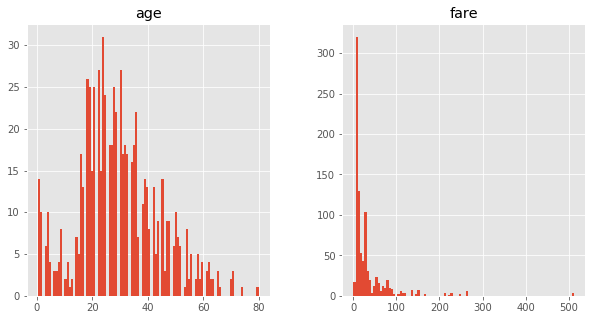

In [32]:
#tomar sólo propiedades Age y Fare del dataframe
#crear un histograma de 100 barras
datos[['age', 'fare']].hist(bins=100, figsize=(10,5))

In [33]:
#mediana de los datos que son numéricos
datos.median()

passengerid    446.0000
survived         0.0000
pclass           3.0000
age             28.0000
sibsp            0.0000
parch            0.0000
fare            14.4542
dtype: float64

In [36]:
#generar otro dataframe para hacer pruebas
datos2 = datos.head(15)
datos2

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


FILTRADO

In [37]:
#obtener una columna
datos["sex"].head()

0      male
1    female
2    female
3    female
4      male
Name: sex, dtype: object

In [38]:
#información por filas
datos[20:28]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S


In [39]:
#obtener información con condicionales
datos[datos["age"] < 35].head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [40]:
#información con más de un condicional-filtro
datos[(datos["sex"] == "female") & (datos["survived"] == 0) & (datos["pclass"] == 1)].head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S


In [42]:
#ver datos con alguna columna vacía, por ejemplo age
#datos.age o datos["age"] son ambos válidos, como en un diccionario
datos[pd.isna(datos.age)].head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [46]:
#número de mujeres sobrevivientes
MS = len(datos[(datos.sex == "female") & (datos.survived == 1)])
print("Mujeres sobrevivientes: ", MS)

Mujeres sobrevivientes:  233


TRANSFORMACIONES A LA BASE DE DATOS CON PANDAS

In [47]:
#crear columna impuestos
datos["tax"] = datos.fare*16/100
datos.tax.head()

0     1.160000
1    11.405328
2     1.268000
3     8.496000
4     1.288000
Name: tax, dtype: float64

In [48]:
#borrar columnas de la base de datos
#¿qué hace el parámetro axis?
datos.drop(["sibsp", "parch", "ticket"], axis = 1).head()

,passengerid,survived,pclass,name,sex,age,fare,cabin,embarked,tax
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,NaN,S,1.160000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C,11.405328
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,NaN,S,1.268000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C123,S,8.496000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,NaN,S,1.288000


In [50]:
datos.drop(0).head()
#me vuelve a mostrar columnas borradas porque no sobreescribe la variable
#puede sobreescribirse reasignando la variable datos, o bien
#añadiendo el parámetro inplace = True, después de axis

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,tax
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,11.405328
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.268000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,8.496000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.288000
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1.353328


In [52]:
#pueden eliminarse filas con un rango
datos.drop(range(0, 130)).head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,tax
130,131,0,3,"Drazenoic, Mr. Jozef",male,33.0,0,0,349241,7.8958,NaN,C,1.263328
131,132,0,3,"Coelho, Mr. Domingos Fernandeo",male,20.0,0,0,SOTON/O.Q. 3101307,7.0500,NaN,S,1.128000
132,133,0,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,A/5. 3337,14.5000,NaN,S,2.320000
133,134,1,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.0000,NaN,S,4.160000
134,135,0,2,"Sobey, Mr. Samuel James Hayden",male,25.0,0,0,C.A. 29178,13.0000,NaN,S,2.080000


GROUPBY
#Herramienta de resumend de datos que permite realizar operaciones matemáticas sencillas, agrupando por categorías
#Estructura:
#columna de categorías
#columna de condición
#operación

In [53]:
#ejemplo: por sexo cuántos sobrevivieron
datos.groupby("sex")["survived"].count()

sex
female    314
male      577
Name: survived, dtype: int64

In [54]:
#ver datos estadísticos del mismo ejemplo
datos.groupby("sex")["survived"].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,314.0,0.742038,0.438211,0.0,0.0,1.0,1.0,1.0
male,577.0,0.188908,0.391775,0.0,0.0,0.0,0.0,1.0


In [55]:
#por sexo, tomar edad y sobrevivientes y obtener promedio
datos.groupby("sex")["survived", "age"].mean()

,survived,age
sex,,
female,0.742038,27.915709
male,0.188908,30.726645


In [57]:
#crear nueva base de datos
#para qué sirve función is in¿? Además, en el ejemplo, 1, 2, 3 eran cadenas y funcionó igual
dfPclass = datos[datos.pclass.isin([1, 2, 3])]

In [58]:
#agrupar por sexo y clase
#tomar el promedio de sobrevivientes
dfPclass.groupby(by = ["pclass", "sex"])["survived"].mean()

pclass  sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: survived, dtype: float64

In [60]:
#guardar el grupo
grupo1 = dfPclass.groupby(by = ["pclass", "sex"])["survived"]

In [61]:
#operar sobre éste
grupo1.mean()

pclass  sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: survived, dtype: float64